**Author:** Kevin ALBERT

**Created:** August 2020

# Azure Cognitive AI
_**Illustrate Python code samples on how to transform unstructured data using cognitive services**_

## Contents

  * VISION
    * [Computer Vision](#Computer_Vision)
      * [analyze image](#analyze_image)
      * [describe image](#describe_image)
      * [detect objects](#detect_objects)
      * [area of interest](#area_of_interest)
      * [get thumbnail](#get_thumbnail)
      * [ocr](#ocr)
      * [read](#read)
      * [recognize domain-specific content](#recognize_domain-specific_content)
      * [tag image](#tag_image)
    * [Custom Vision](#Custom_Vision)
      * [create project](#create_project)
      * [create_tags](#create_tags)
      * [split batch](#split_batch)
      * [upload images](#upload_images)
      * [train_model](#train_model)
      * [publish_model](#publish_model)
      * [prediction](#prediction) 
    * [Face](#Face)
      * [face_detection](#face_detection)
      * [face_similarity](#face_similarity)
      * [face_grouping](#face_grouping)
      * [face_identification](#face_identification)
      * [face_verification](#face_verification)
  * LANGUAGE
    * [Text_Analytics](#Text_Analytics)
      * [detect_language](#detect_language)
      * [key_phrases](#key_phrases)
      * [linked_entities](#linked_entities)
      * [named_entities](#named_entities)
      * [sentiment](#sentiment)
  * SPEECH
    * [Text_to_Speech](#Text_to_Speech)
    * [Speech_to_Text](#Speech_to_Text)

### install python SDK

In [1]:
# computervision 
!pip install --upgrade azure-cognitiveservices-vision-computervision
# customvision
!pip install --upgrade azure-cognitiveservices-vision-customvision
# face
!pip install --upgrade azure-cognitiveservices-vision-face
# text
!pip install --upgrade azure-ai-textanalytics
# speech
!pip install --upgrade azure-cognitiveservices-speech
# pillow
!conda install -y -c conda-forge pillow
# requests
!conda install -y -c conda-forge requests
# matplotlib
!conda install -y -c conda-forge matplotlib

Requirement already up-to-date: azure-cognitiveservices-vision-computervision in /anaconda/envs/py38_cognitive/lib/python3.8/site-packages (0.6.0)
Requirement already up-to-date: azure-cognitiveservices-vision-customvision in /anaconda/envs/py38_cognitive/lib/python3.8/site-packages (3.0.0)
Requirement already up-to-date: azure-cognitiveservices-vision-face in /anaconda/envs/py38_cognitive/lib/python3.8/site-packages (0.4.1)
Requirement already up-to-date: azure-ai-textanalytics in /anaconda/envs/py38_cognitive/lib/python3.8/site-packages (5.0.0)


Requirement already up-to-date: azure-cognitiveservices-speech in /anaconda/envs/py38_cognitive/lib/python3.8/site-packages (1.13.0)
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [2]:
# current python SDK versions:
!pip freeze | grep azure-cognitiveservices-vision-computervision
!pip freeze | grep azure-cognitiveservices-vision-customvision
!pip freeze | grep azure-cognitiveservices-vision-face
!pip freeze | grep azure-ai-textanalytics
!pip freeze | grep azure-cognitiveservices-speech

azure-cognitiveservices-vision-computervision==0.6.0
azure-cognitiveservices-vision-customvision==3.0.0
azure-cognitiveservices-vision-face==0.4.1
azure-ai-textanalytics==5.0.0
azure-cognitiveservices-speech==1.13.0


Generated API keys and endpoints from a script that created all services

In [3]:
# --- DECISION ---
azure_anomalydetector_key = '83d47ee03673474689c1ec7b911a239f'
azure_contentmoderator_key = 'ac3552fefa4846d4ac517f0e752878e5'
azure_personalizer_key = 'e43f8ef1524944fbb3847afa11c79831'
# --- LANGUAGE ---
azure_languageunderstandingPrediction_key = '1b65100e2968462e919e6c19c3cb7916'
azure_languageunderstandingAuthoring_key = '91ece34f0c6b477e815229baef60242e' 
azure_textanalytics_key = '2264e20d7c4e467687e4540538968309'
azure_textanalytics_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
azure_textanalytics_url = azure_textanalytics_endpoint + 'text/analytics/v3.0'
azure_translator_key = 'cddaf0b8712b4d9f8da5653af4d50fdc'
# --- SPEECH ---
azure_speech_key = '1612fbcd19fd4ebaa10fa21273e3ccaf'
azure_speech_region = 'westeurope'
azure_speech_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
# --- VISION ---
azure_computervision_key = 'a7f71d29221546a4a9692f3d15a1919a'
azure_computervision_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
azure_computervision_url = azure_computervision_endpoint + 'vision/v3.0'
azure_customvisionTrain_key = '2f0f0119820e4c12b5750d3cf84127f3'
azure_customvisionTrain_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
azure_customvisionTrain_url = azure_customvisionTrain_endpoint + 'customvision/v3.3/Training'
azure_customvisionPredict_key = '54796217dd0e48619411070e48c9c2c6'
azure_customvisionPredict_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
azure_customvisionPredict_url = azure_customvisionPredict_endpoint + 'customvision/v3.1/Prediction'
azure_customvisionPredict_resourceid = '/subscriptions/43c1f93a-903d-4b23-a4bf-92bd7a150627/resourceGroups/cognitiveRG/providers/Microsoft.CognitiveServices/accounts/customvisionPrediction230820'
azure_face_key = 'adb4a6f9f5c5464eb0a4d961f990118f'
azure_face_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
azure_face_url = azure_face_endpoint + 'face/v1.0'
azure_formRecognizer_key = 'bf5291fbc8b942e5b3dde8a8340488a1'

### Import open-source packages

In [4]:
import warnings
warnings.filterwarnings("ignore")
import os
import requests
import json
import time
import uuid
import glob
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from IPython.display import Audio

### Import azure cognitive services SDK packages

In [5]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import TrainingStatusType
from azure.ai.textanalytics import TextAnalyticsClient
from azure.cognitiveservices.speech import SpeechConfig
from azure.cognitiveservices.speech import SpeechSynthesizer
from azure.cognitiveservices.speech import AudioConfig
from azure.cognitiveservices.speech import SpeechRecognizer
from azure.cognitiveservices.speech.audio import AudioOutputConfig
from msrest.authentication import ApiKeyCredentials            # for custom vision
from msrest.authentication import CognitiveServicesCredentials # for computer vision
from azure.core.credentials import AzureKeyCredential          # for text analytics

# Computer_Vision

**_You can find all cognitive services_** [here](https://westeurope.dev.cognitive.microsoft.com/docs/services?pageSize=0)

|Operation|Description|Request|URL|Parameters|
|-|-|-|-|-|
|**analyze image**|extracts a rich set of visual features|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**analyze**</i>|visualFeatures<br>details<br>language|
|**describe image**|generates a description of an image|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**describe**</i>|maxCandidates<br>language|
|**detect objects**|object detection on the specified image|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**detect**</i>|-|
|**get area of interest**|get bounding box around the most important area|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**areaOfInterest**</i>|-|
|**get thumbnail**|generates a user-specified thumbnail image|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**generateThumbnail**</i>|width<br>height<br>smartCropping|
|**OCR**|Optical Character Recognition|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**ocr**</i>|language<br>detectOrientation|
|**read**|detects text from hand-written documents|<span style="color:red">POST</span><br><span style="color:green">GET</span>|<i>https://{endpoint}/vision/v3.0/**read/analyze**</i>|language|
|**recognize domain specific content**|detect domain-specific content|<span style="color:red">POST</span><br><span style="color:green">GET</span>|<i>https://{endpoint}/vision/v3.0/**models/celebrities/analyze**</i><br><i>https://{endpoint}/vision/v3.0/**models/landmarks/analyze**</i>|language|
|**tag image**|generates a list of words of an image|<span style="color:red">POST</span>|<i>https://{endpoint}/vision/v3.0/**tag**</i>|language|

### analyze_image

(-0.5, 599.5, 461.5, -0.5)

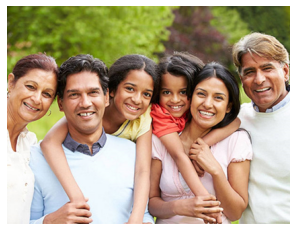

In [6]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/3-people.png"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://docs.microsoft.com/en-us/learn/advocates/create-computer-vision-service-to-classify-images/media/3-people.png"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")

In [7]:
# set operation URL:
url = "{0}/analyze".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/analyze


In [8]:
# parameters (only comma-separated, no space)
querystring = dict()
querystring['visualFeatures'] = 'Adult,Brands,Categories,Color,Description,Faces,ImageType,Objects,Tags'
querystring['details'] = 'Celebrities,Landmarks'
querystring['language'] = 'en'

In [9]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [10]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [11]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'categories': [{'name': 'people_group',
   'score': 0.97265625,
   'detail': {'celebrities': [{'name': 'Bern Collaco',
      'confidence': 0.9999589920043945,
      'faceRectangle': {'left': 118,
       'top': 159,
       'width': 95,
       'height': 95}}]}}],
 'adult': {'isAdultContent': False,
  'isRacyContent': False,
  'isGoryContent': False,
  'adultScore': 0.0013711383799090981,
  'racyScore': 0.0046537225134670734,
  'goreScore': 0.0016747883055359125},
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White', 'Brown'],
  'accentColor': '4E5D1A',
  'isBwImg': False,
  'isBWImg': False},
 'imageType': {'clipArtType': 0, 'lineDrawingType': 0},
 'tags': [{'name': 'smile', 'confidence': 0.9973883628845215},
  {'name': 'outdoor', 'confidence': 0.997002363204956},
  {'name': 'person', 'confidence': 0.9948687553405762},
  {'name': 'human face', 'confidence': 0.9803503751754761},
  {'name': 'posing', 'confidence': 0.958080887794

In [12]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.analyze_image(url=image_url,
                                visual_features=['Adult','Brands','Categories','Color','Description','Faces','ImageType','Objects','Tags'],
                                details=['Celebrities','Landmarks'],
                                language='en',
                                description_exclude=None,
                                custom_headers=None,
                                raw=False)
response.as_dict()

{'categories': [{'name': 'people_group',
   'score': 0.97265625,
   'detail': {'celebrities': [{'name': 'Bern Collaco',
      'confidence': 0.9999589920043945,
      'face_rectangle': {'left': 118,
       'top': 159,
       'width': 95,
       'height': 95}}]}}],
 'adult': {'is_adult_content': False,
  'is_racy_content': False,
  'is_gory_content': False,
  'adult_score': 0.0013711389619857073,
  'racy_score': 0.004653721582144499,
  'gore_score': 0.0016747883055359125},
 'color': {'dominant_color_foreground': 'White',
  'dominant_color_background': 'White',
  'dominant_colors': ['White', 'Brown'],
  'accent_color': '4E5D1A',
  'is_bw_img': False},
 'image_type': {'clip_art_type': 0, 'line_drawing_type': 0},
 'tags': [{'name': 'smile', 'confidence': 0.9973883628845215},
  {'name': 'outdoor', 'confidence': 0.997002363204956},
  {'name': 'person', 'confidence': 0.9948687553405762},
  {'name': 'human face', 'confidence': 0.9803503751754761},
  {'name': 'posing', 'confidence': 0.9580808877

### describe_image

(-0.5, 649.5, 432.5, -0.5)

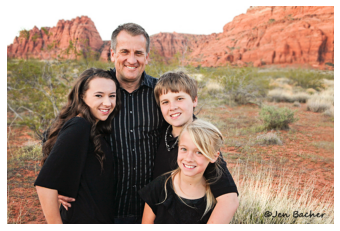

In [13]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/IMG_7184edit.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://www.clickitupanotch.com/wp-content/uploads/2012/05/IMG_7184edit.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [14]:
# set operation URL:
url = "{0}/describe".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/describe


In [15]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
querystring['maxCandidates'] = '3'
querystring['language'] = 'en'

In [16]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [17]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [18]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'description': {'tags': ['person',
   'outdoor',
   'grass',
   'mountain',
   'posing',
   'young',
   'boy',
   'smiling',
   'front',
   'woman',
   'girl',
   'holding',
   'child',
   'standing',
   'man',
   'sitting',
   'people',
   'shirt',
   'field',
   'riding',
   'playing'],
  'captions': [{'text': 'a boy and a girl posing for a picture',
    'confidence': 0.8514669677734833},
   {'text': 'a boy and girl posing for a picture',
    'confidence': 0.8125984168387541},
   {'text': 'a boy and a girl posing in front of a mountain',
    'confidence': 0.8115984168387541}]},
 'requestId': 'f3a31e04-5054-4d1c-b28c-c00eab2ff0b8',
 'metadata': {'height': 433, 'width': 650, 'format': 'Jpeg'}}

In [19]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.describe_image(url=image_url,
                                 max_candidates=3,
                                 language='en',
                                 description_exclude=None,
                                 custom_headers=None,
                                 raw=False)
response.as_dict()

{'tags': ['person',
  'outdoor',
  'grass',
  'mountain',
  'posing',
  'young',
  'boy',
  'smiling',
  'front',
  'woman',
  'girl',
  'holding',
  'child',
  'standing',
  'man',
  'sitting',
  'people',
  'shirt',
  'field',
  'riding',
  'playing'],
 'captions': [{'text': 'a boy and a girl posing for a picture',
   'confidence': 0.8514669677734833},
  {'text': 'a boy and girl posing for a picture',
   'confidence': 0.8125984168387541},
  {'text': 'a boy and a girl posing in front of a mountain',
   'confidence': 0.8115984168387541}],
 'request_id': 'c59605fc-9a00-44bf-93cd-9e85f9716d2c',
 'metadata': {'width': 650, 'height': 433, 'format': 'Jpeg'}}

### detect_objects

(-0.5, 3999.5, 2247.5, -0.5)

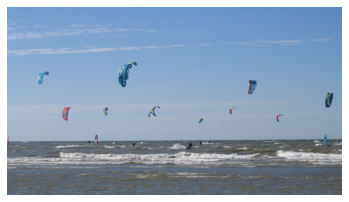

In [20]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/mv2_d_4000_2248_s_2.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://static.wixstatic.com/media/1a250b_c704f4e785744e9e8d200638cc9c88fd~mv2_d_4000_2248_s_2.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [21]:
# set operation URL:
url = "{0}/detect".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/detect


In [22]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()

In [23]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [24]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [25]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'objects': [{'rectangle': {'x': 369, 'y': 770, 'w': 108, 'h': 149},
   'object': 'Kite',
   'confidence': 0.639,
   'parent': {'object': 'Toy', 'confidence': 0.64}},
  {'rectangle': {'x': 1334, 'y': 679, 'w': 183, 'h': 281},
   'object': 'Kite',
   'confidence': 0.706,
   'parent': {'object': 'Toy', 'confidence': 0.707}},
  {'rectangle': {'x': 2871, 'y': 887, 'w': 91, 'h': 157},
   'object': 'Kite',
   'confidence': 0.736,
   'parent': {'object': 'Toy', 'confidence': 0.738}},
  {'rectangle': {'x': 3818, 'y': 1030, 'w': 85, 'h': 159},
   'object': 'Kite',
   'confidence': 0.636,
   'parent': {'object': 'Toy', 'confidence': 0.637}},
  {'rectangle': {'x': 667, 'y': 1217, 'w': 75, 'h': 135},
   'object': 'Kite',
   'confidence': 0.592,
   'parent': {'object': 'Toy', 'confidence': 0.594}},
  {'rectangle': {'x': 1154, 'y': 1211, 'w': 40, 'h': 74},
   'object': 'Kite',
   'confidence': 0.506,
   'parent': {'object': 'Toy', 'confidence': 0.508}},
  {'rectangle': {'x': 1714, 'y': 1197, 'w': 91

In [26]:
# use-case example:
counter = 0
for obj in json.loads(response.text)['objects']:
    if obj['object'] == 'Kite':
        counter += 1
print("number of kiters:", counter)

number of kiters: 9


In [27]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.detect_objects(url=image_url,
                                 custom_headers=None,
                                 raw=False)
response.as_dict()

{'objects': [{'rectangle': {'x': 369, 'y': 770, 'w': 108, 'h': 149},
   'object_property': 'Kite',
   'confidence': 0.639,
   'parent': {'object_property': 'Toy', 'confidence': 0.64}},
  {'rectangle': {'x': 1334, 'y': 679, 'w': 183, 'h': 281},
   'object_property': 'Kite',
   'confidence': 0.706,
   'parent': {'object_property': 'Toy', 'confidence': 0.707}},
  {'rectangle': {'x': 2871, 'y': 887, 'w': 91, 'h': 157},
   'object_property': 'Kite',
   'confidence': 0.736,
   'parent': {'object_property': 'Toy', 'confidence': 0.738}},
  {'rectangle': {'x': 3818, 'y': 1030, 'w': 85, 'h': 159},
   'object_property': 'Kite',
   'confidence': 0.636,
   'parent': {'object_property': 'Toy', 'confidence': 0.637}},
  {'rectangle': {'x': 667, 'y': 1217, 'w': 75, 'h': 135},
   'object_property': 'Kite',
   'confidence': 0.592,
   'parent': {'object_property': 'Toy', 'confidence': 0.594}},
  {'rectangle': {'x': 1154, 'y': 1211, 'w': 40, 'h': 74},
   'object_property': 'Kite',
   'confidence': 0.506,
 

### area_of_interest

(-0.5, 649.5, 432.5, -0.5)

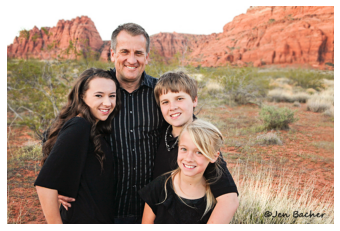

In [28]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/IMG_7184edit.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://www.clickitupanotch.com/wp-content/uploads/2012/05/IMG_7184edit.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [29]:
# set operation URL:
url = "{0}/areaOfInterest".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/areaOfInterest


In [30]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()

In [31]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [32]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [33]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'areaOfInterest': {'x': 65, 'y': 0, 'w': 431, 'h': 433},
 'requestId': '97e5d248-d14c-4143-ba2e-9302ea15a4bf',
 'metadata': {'height': 433, 'width': 650, 'format': 'Jpeg'}}

In [34]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.get_area_of_interest(url=image_url,
                                       custom_headers=None,
                                       raw=False)
response.as_dict()

{'area_of_interest': {'x': 65, 'y': 0, 'w': 431, 'h': 433},
 'request_id': 'ce7eecfa-ebe2-4a29-8688-65127ce88cf5',
 'metadata': {'width': 650, 'height': 433, 'format': 'Jpeg'}}

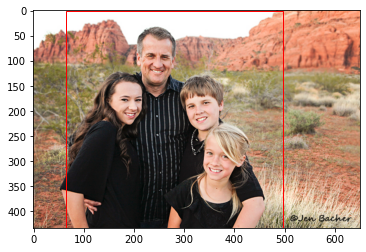

In [35]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((65, 0), 431, 433, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

### get_thumbnail

(-0.5, 1382.5, 922.5, -0.5)

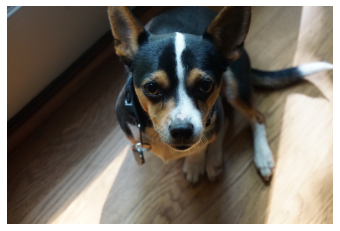

In [36]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/4-dog.png"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://docs.microsoft.com/en-us/learn/advocates/create-computer-vision-service-to-classify-images/media/4-dog.png"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [37]:
# set operation URL:
url = "{0}/generateThumbnail".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/generateThumbnail


In [38]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
querystring['width'] = '100'
querystring['height'] = '100'
querystring['smartCropping'] = 'true'

In [39]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [40]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [41]:
# send the API request
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)

In [42]:
# save the thumbnail file
with open("../../data/bronze/cognitive/computervision/4-dog-thumbnail.jpg", "wb") as f:
    f.write(response.content)

(-0.5, 99.5, 99.5, -0.5)

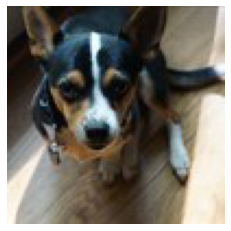

In [43]:
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.axis("off")

In [44]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.generate_thumbnail(width=100,
                                     height=100,
                                     url=image_url,
                                     smart_cropping=True,
                                     custom_headers=None,
                                     raw=False,
                                     callback=None)

In [45]:
# save the thumbnail file
with open("../../data/bronze/cognitive/computervision/4-dog-thumbnail.jpg", "wb") as f:
    for chunck in response:
        f.write(chunck)

(-0.5, 99.5, 99.5, -0.5)

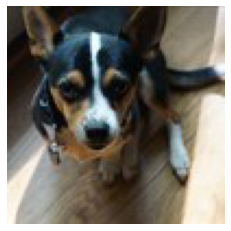

In [46]:
#Similar result
image = Image.open("../../data/bronze/cognitive/computervision/4-dog-thumbnail.jpg")
plt.imshow(image)
plt.axis("off")

### ocr

(-0.5, 412.5, 539.5, -0.5)

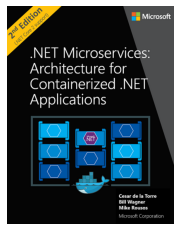

In [47]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/5-ebook.png"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://docs.microsoft.com/en-us/learn/advocates/create-computer-vision-service-to-classify-images/media/5-ebook.png"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [48]:
# set operation URL:
url = "{0}/ocr".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/ocr


In [49]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
querystring['language'] = 'unk'
querystring['detectOrientation'] = 'true'

In [50]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [51]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [52]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '57,18,348,509',
   'lines': [{'boundingBox': '335,18,70,14',
     'words': [{'boundingBox': '335,18,70,14', 'text': 'Microsoft'}]},
    {'boundingBox': '67,102,286,27',
     'words': [{'boundingBox': '67,102,60,27', 'text': 'NET'},
      {'boundingBox': '140,102,213,27', 'text': 'Microservices:'}]},
    {'boundingBox': '57,139,239,29',
     'words': [{'boundingBox': '57,139,185,29', 'text': 'Architecture'},
      {'boundingBox': '253,139,43,29', 'text': 'for'}]},
    {'boundingBox': '58,178,291,28',
     'words': [{'boundingBox': '58,178,209,28', 'text': 'Containerized'},
      {'boundingBox': '280,179,69,27', 'text': '.NET'}]},
    {'boundingBox': '57,216,188,37',
     'words': [{'boundingBox': '57,216,188,37', 'text': 'Applications'}]},
    {'boundingBox': '277,465,93,10',
     'words': [{'boundingBox': '277,466,30,9', 'text': 'Cesar'},
      {'boundingBox': '310,466,14,9', 'text': 'de'},
      

In [53]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.recognize_printed_text(url=image_url,
                                         detect_orientation=True,
                                         language='unk',
                                         custom_headers=None,
                                         raw=False)
response.as_dict()

{'language': 'en',
 'text_angle': 0.0,
 'orientation': 'Up',
 'regions': [{'bounding_box': '57,18,348,509',
   'lines': [{'bounding_box': '335,18,70,14',
     'words': [{'bounding_box': '335,18,70,14', 'text': 'Microsoft'}]},
    {'bounding_box': '67,102,286,27',
     'words': [{'bounding_box': '67,102,60,27', 'text': 'NET'},
      {'bounding_box': '140,102,213,27', 'text': 'Microservices:'}]},
    {'bounding_box': '57,139,239,29',
     'words': [{'bounding_box': '57,139,185,29', 'text': 'Architecture'},
      {'bounding_box': '253,139,43,29', 'text': 'for'}]},
    {'bounding_box': '58,178,291,28',
     'words': [{'bounding_box': '58,178,209,28', 'text': 'Containerized'},
      {'bounding_box': '280,179,69,27', 'text': '.NET'}]},
    {'bounding_box': '57,216,188,37',
     'words': [{'bounding_box': '57,216,188,37', 'text': 'Applications'}]},
    {'bounding_box': '277,465,93,10',
     'words': [{'bounding_box': '277,466,30,9', 'text': 'Cesar'},
      {'bounding_box': '310,466,14,9', 'te

### read

(-0.5, 562.5, 539.5, -0.5)

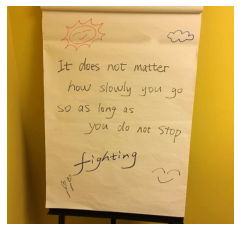

In [54]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/handwriting.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-process-images-with-the-computer-vision-service/master/images/handwriting.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [55]:
# set operation URL:
url = "{0}/read/analyze".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/read/analyze


In [56]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
querystring['language'] = 'en'

In [57]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [58]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [59]:
# send the API request
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)

In [60]:
# set operation URL:
url = response.headers['Operation-Location']
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/read/analyzeResults/7bad0e0e-545f-4f51-8d71-9cb8327efc6e


In [61]:
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()

In [62]:
# headers stay the same

In [63]:
# use GET method and remove data 
response = requests.request(method="GET", url=url, headers=headers, params=querystring)
json.loads(response.text)

{'status': 'succeeded',
 'createdDateTime': '2020-08-11T13:28:49Z',
 'lastUpdatedDateTime': '2020-08-11T13:28:49Z',
 'analyzeResult': {'version': '3.0.0',
  'readResults': [{'page': 1,
    'language': 'en',
    'angle': 0.916,
    'width': 563,
    'height': 540,
    'unit': 'pixel',
    'lines': [{'boundingBox': [123, 133, 405, 137, 404, 168, 123, 163],
      'text': 'It does not matter',
      'words': [{'boundingBox': [125, 133, 172, 133, 172, 164, 125, 164],
        'text': 'It',
        'confidence': 0.984},
       {'boundingBox': [182, 134, 245, 134, 244, 164, 182, 164],
        'text': 'does',
        'confidence': 0.98},
       {'boundingBox': [251, 134, 309, 136, 309, 165, 250, 164],
        'text': 'not',
        'confidence': 0.981},
       {'boundingBox': [321, 137, 404, 140, 403, 168, 321, 166],
        'text': 'matter',
        'confidence': 0.98}]},
     {'boundingBox': [149, 185, 437, 195, 436, 222, 148, 212],
      'text': 'how slowly you go',
      'words': [{'boundin

In [64]:
for line in json.loads(response.text)['analyzeResult']['readResults'][0]['lines']:
    print(line['text'])

It does not matter
how slowly you go
So as long as
you do not stop
Fighting


In [65]:
# Alternative: Azure python SDK implementation
client = ComputerVisionClient(azure_computervision_endpoint, CognitiveServicesCredentials(azure_computervision_key))
response = client.read(url=image_url,
                       language='en',
                       custom_headers=None,
                       raw=True)  # <--- !

In [66]:
response

In [67]:
# set operation URL:
url = response.headers['Operation-Location']
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/read/analyzeResults/f2fde1e2-a406-488b-bc29-d2feeef5cded


In [68]:
url.split('/')[-1]

'f2fde1e2-a406-488b-bc29-d2feeef5cded'

In [69]:
response = client.get_read_result(operation_id=url.split('/')[-1],
                                  custom_headers=None,
                                  raw=False)
response.as_dict()

{'status': 'succeeded',
 'created_date_time': '2020-08-11T13:28:54Z',
 'last_updated_date_time': '2020-08-11T13:28:55Z',
 'analyze_result': {'version': '3.0.0',
  'read_results': [{'page': 1,
    'language': 'en',
    'angle': 0.916,
    'width': 563.0,
    'height': 540.0,
    'unit': 'pixel',
    'lines': [{'bounding_box': [123.0,
       133.0,
       405.0,
       137.0,
       404.0,
       168.0,
       123.0,
       163.0],
      'text': 'It does not matter',
      'words': [{'bounding_box': [125.0,
         133.0,
         172.0,
         133.0,
         172.0,
         164.0,
         125.0,
         164.0],
        'text': 'It',
        'confidence': 0.984},
       {'bounding_box': [182.0,
         134.0,
         245.0,
         134.0,
         244.0,
         164.0,
         182.0,
         164.0],
        'text': 'does',
        'confidence': 0.98},
       {'bounding_box': [251.0,
         134.0,
         309.0,
         136.0,
         309.0,
         165.0,
         250.0

### recognize_domain-specific_content

(-0.5, 1499.5, 999.5, -0.5)

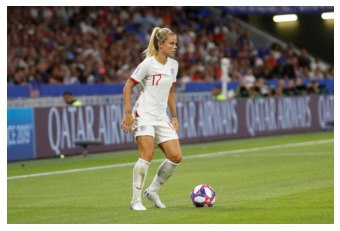

In [70]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/Womens-football-1500x1000.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://careers-in-sport.co.uk/wp-content/uploads/2019/08/Womens-football-1500x1000.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [71]:
# set operation URL:
model = "celebrities" # {celebrities, landmarks}
url = "{0}/models/{1}/analyze".format(azure_computervision_url, model)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/models/celebrities/analyze


In [72]:
# parameters (only comma-separated, no space)
querystring = dict()
querystring['language'] = 'en'

In [73]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [74]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [75]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'result': {'celebrities': [{'name': 'Rachel Daly',
    'confidence': 0.9967231154441833,
    'faceRectangle': {'left': 735, 'top': 157, 'width': 62, 'height': 62}}]},
 'requestId': '280560ce-10c7-41e5-b121-bb40efbc1ceb',
 'metadata': {'height': 1000, 'width': 1500, 'format': 'Jpeg'}}

In [76]:
response = client.analyze_image_by_domain(model='celebrities',
                                          url=image_url,
                                          language='en',
                                          custom_headers=None,
                                          raw=False)
response.as_dict()

{'result': {'celebrities': [{'name': 'Rachel Daly',
    'confidence': 0.9967231154441833,
    'faceRectangle': {'left': 735, 'top': 157, 'width': 62, 'height': 62}}]},
 'request_id': '46c5fa2c-bf75-4d8f-93e5-88eacb310fe2',
 'metadata': {'width': 1500, 'height': 1000, 'format': 'Jpeg'}}

### tag_image

(-0.5, 1399.5, 599.5, -0.5)

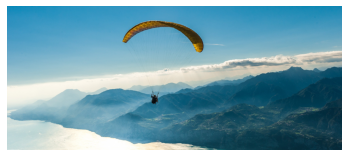

In [77]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/computervision/foto_header-00-paragliding-tandemflug-gardasee-360gardalife.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://360gardalife.com/images/thumb/1400x600/articoli/504/foto_header-00-paragliding-tandemflug-gardasee-360gardalife.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))

plt.imshow(image)
plt.axis("off")

In [78]:
# set operation URL:
url = "{0}/tag".format(azure_computervision_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/vision/v3.0/tag


In [79]:
# parameters (only comma-separated, no space)
querystring = dict()
querystring['language'] = 'en'

In [80]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [81]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_computervision_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [82]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

{'tags': [{'name': 'sky', 'confidence': 0.9994410276412964},
  {'name': 'mountain', 'confidence': 0.9991973042488098},
  {'name': 'outdoor', 'confidence': 0.9936287999153137},
  {'name': 'parachute', 'confidence': 0.9703863859176636},
  {'name': 'snow', 'confidence': 0.9693533182144165},
  {'name': 'paragliding', 'confidence': 0.8620028495788574},
  {'name': 'parachuting', 'confidence': 0.8512367606163025},
  {'name': 'adventure', 'confidence': 0.8161634206771851},
  {'name': 'nature', 'confidence': 0.7771839499473572},
  {'name': 'air sports', 'confidence': 0.7664238214492798},
  {'name': 'sports equipment', 'confidence': 0.7546842098236084},
  {'name': 'flying', 'confidence': 0.7520742416381836},
  {'name': 'windsports', 'confidence': 0.7238636016845703},
  {'name': 'extreme sport', 'confidence': 0.6736124157905579},
  {'name': 'kite sports', 'confidence': 0.5124121904373169}],
 'requestId': '764a6450-a0a9-4ad3-8cf9-bd2eed7857d4',
 'metadata': {'height': 600, 'width': 1400, 'format':

In [83]:
response = client.tag_image(url=image_url,
                            language='en',
                            custom_headers=None,
                            raw=False)
response.as_dict()

{'tags': [{'name': 'sky', 'confidence': 0.9994410276412964},
  {'name': 'mountain', 'confidence': 0.9991973042488098},
  {'name': 'outdoor', 'confidence': 0.9936287999153137},
  {'name': 'parachute', 'confidence': 0.9703863859176636},
  {'name': 'snow', 'confidence': 0.9693533182144165},
  {'name': 'paragliding', 'confidence': 0.8620028495788574},
  {'name': 'parachuting', 'confidence': 0.8512367606163025},
  {'name': 'adventure', 'confidence': 0.8161634206771851},
  {'name': 'nature', 'confidence': 0.7771839499473572},
  {'name': 'air sports', 'confidence': 0.7664238214492798},
  {'name': 'sports equipment', 'confidence': 0.7546842098236084},
  {'name': 'flying', 'confidence': 0.7520742416381836},
  {'name': 'windsports', 'confidence': 0.7238636016845703},
  {'name': 'extreme sport', 'confidence': 0.6736124157905579},
  {'name': 'kite sports', 'confidence': 0.5124121904373169}],
 'request_id': 'a6baf496-a1c2-4613-ab46-86c1a9e9abf7',
 'metadata': {'width': 1400, 'height': 600, 'format'

# Custom_Vision

Customized image recognition, set model in the cloud to perceive a particular object for any use-case.  
Custom Vision can be configured using [customvision.ai](https://www.customvision.ai/) web portal.  
We focus on using python SDK. (added one REST API example for creating a project and [find all cognitive services](https://westeurope.dev.cognitive.microsoft.com/docs/services?pageSize=0))  
We can choose two main classification types: _multiclass_ or _multilabel_.  

**multiclass classification**  
each image is assigned to only one tag  
**howto:** based on [dataset](https://towardsdatascience.com/create-a-model-with-azure-custom-vision-and-python-7bc5caed82c4) (Henk Boelman)  
**howto:** [microsoft docs](https://docs.microsoft.com/en-us/azure/cognitive-services/custom-vision-service/quickstarts/image-classification)  
  1. [create project](#create_project)
  1. [create_tags](#create_tags)
  1. [split batch](#split_batch)
  1. [upload images](#upload_images)
  1. [train_model](#train_model)
  1. [publish_model](#publish_model)
  1. [prediction](#prediction)  

**multilabel object detector**  
one image can be assigned one or more tags using bounding boxes    
**howto:** based on [notebook](https://nbviewer.jupyter.org/github/jwood803/CognitiveServicesExamples/blob/master/CustomVision/ObjectDetection/Custom%20Vision%20Object%20Detection.ipynb)  
**howto:** [microsoft docs](https://docs.microsoft.com/en-us/azure/cognitive-services/custom-vision-service/quickstarts/object-detection)  
**video:** https://www.youtube.com/watch?v=TX4MrMNYkXs  
**use web portal to tag bounding boxes**

### create_project

**option1:** create project using REST API (alternative)

In [84]:
# set operation URL:
url = "{0}/projects".format(azure_customvisionTrain_url)
print(url)

# parameters (only comma-separated, no space)
querystring = dict()
querystring['name'] = 'Lego - Simpsons - REST API'
querystring['description'] = 'custom vision using REST API requests'
# querystring['domainId'] = ''
querystring['classificationType'] = 'Multiclass' # {Multilabel (multiple tags per image), Multiclass (single tag per image)}
# querystring['targetExportPlatforms'] = ''

# no payload

headers = dict()
headers['Training-key'] = azure_customvisionTrain_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

https://westeurope.api.cognitive.microsoft.com/customvision/v3.3/Training/projects


In [85]:
# send POST and show results
response = requests.request(method="POST", url=url, headers=headers, params=querystring)
json.loads(response.text)

{'id': '1b4fa46e-a3c5-4332-98fe-00ef4bde00e7',
 'name': 'Lego - Simpsons - REST API',
 'description': 'custom vision using REST API requests',
 'settings': {'domainId': 'ee85a74c-405e-4adc-bb47-ffa8ca0c9f31',
  'classificationType': 'Multiclass',
  'targetExportPlatforms': [],
  'useNegativeSet': True,
  'detectionParameters': None,
  'imageProcessingSettings': {'augmentationMethods': {'rotation': True,
    'scaling': True,
    'translation': True,
    'horizontal flip': True,
    'equalize': True,
    'solarize': True,
    'padtosquare': True}}},
 'created': '2020-08-11T13:29:19.283Z',
 'lastModified': '2020-08-11T13:29:19.283Z',
 'thumbnailUri': None,
 'drModeEnabled': False,
 'status': 'Succeeded'}

In [86]:
print("REST API Domain id= {}".format(json.loads(response.text)['id']))

REST API Domain id= 1b4fa46e-a3c5-4332-98fe-00ef4bde00e7


**option2:** create project using Python SDK

In [87]:
# register the API keys using these specific header names "Training-key" and "Prediction-key"
credentials = ApiKeyCredentials(in_headers={"Training-key": azure_customvisionTrain_key,
                                            "Prediction-key": azure_customvisionPredict_key})

In [88]:
trainer = CustomVisionTrainingClient(azure_customvisionTrain_endpoint, credentials)

In [89]:
# domains to train on:
for domain in trainer.get_domains():   
   print(domain.id, "\t", domain.name)

ee85a74c-405e-4adc-bb47-ffa8ca0c9f31 	 General
c151d5b5-dd07-472a-acc8-15d29dea8518 	 Food
ca455789-012d-4b50-9fec-5bb63841c793 	 Landmarks
b30a91ae-e3c1-4f73-a81e-c270bff27c39 	 Retail
45badf75-3591-4f26-a705-45678d3e9f5f 	 Adult
0732100f-1a38-4e49-a514-c9b44c697ab5 	 General (compact)
8882951b-82cd-4c32-970b-d5f8cb8bf6d7 	 Food (compact)
b5cfd229-2ac7-4b2b-8d0a-2b0661344894 	 Landmarks (compact)
6b4faeda-8396-481b-9f8b-177b9fa3097f 	 Retail (compact)
da2e3a8a-40a5-4171-82f4-58522f70fbc1 	 General
1d8ffafe-ec40-4fb2-8f90-72b3b6cecea4 	 Logo
3780a898-81c3-4516-81ae-3a139614e1f3 	 Products on Shelves
a27d5ca5-bb19-49d8-a70a-fec086c47f5b 	 General (compact)
7ec2ac80-887b-48a6-8df9-8b1357765430 	 General (compact) [S1]


The word “Compact” means the Azure Custom Vision Service will create a smaller model,  
which you will be able to export and run locally on your mobile phone or desktop.

In [90]:
# create a new project with the domain set to “General Compact”
project = trainer.create_project(name='Lego - Simpsons - Python SDK',
                                 description='custom vision using REST API requests',
                                 domain_id='0732100f-1a38-4e49-a514-c9b44c697ab5',  # General (Compact)
                                 classification_type='Multiclass')
print("Python SDK Domain id: {}".format(project.id))
project.__dict__

Python SDK Domain id: 898c69b4-3b21-4d18-8e7a-747d19265287


{'additional_properties': {},
 'id': '898c69b4-3b21-4d18-8e7a-747d19265287',
 'name': 'Lego - Simpsons - Python SDK',
 'description': 'custom vision using REST API requests',
 'settings': <azure.cognitiveservices.vision.customvision.training.models._models_py3.ProjectSettings at 0x7f783ceaaf60>,
 'created': datetime.datetime(2020, 8, 11, 13, 29, 25, 210000, tzinfo=<isodate.tzinfo.Utc object at 0x7f7848426a58>),
 'last_modified': datetime.datetime(2020, 8, 11, 13, 29, 25, 210000, tzinfo=<isodate.tzinfo.Utc object at 0x7f7848426a58>),
 'thumbnail_uri': None,
 'dr_mode_enabled': False,
 'status': 'Succeeded'}

### create_tags

In [91]:
training_images = "../../data/bronze/cognitive/customvision/LegoSimpsons/TrainingImages"

In [92]:
# directory names = tag name references
os.listdir(training_images)

['Homer', 'Marge']

In [93]:
# two sample training datasets
print(os.path.join(training_images, "Marge"))
print(os.path.join(training_images, "Homer"))

../../data/bronze/cognitive/customvision/LegoSimpsons/TrainingImages/Marge
../../data/bronze/cognitive/customvision/LegoSimpsons/TrainingImages/Homer


In [94]:
# Create tags for the project - limit of 20 tags
# tag = trainer.create_tag(project.id, "Marge")
# tag = trainer.create_tag(project.id, "Homer")

In [95]:
image_list = []
tagnames = ['Homer', 'Marge'] # tag names () - limit of 20 tags
for tagName in tagnames:
    tag = trainer.create_tag(project.id, tagName) # Create unique tags for the project
    images = os.listdir(os.path.join(training_images, tagName)) # file list in each directory
    for img in images:
        with open(os.path.join(training_images,tagName,img), "rb") as image_contents: # load each image in memory
            # Now you have a list that contains only the tagged images
            image_list.append(ImageFileCreateEntry(name=img,
                                                   contents=image_contents.read(),
                                                   tag_ids=[tag.id]))

### split_batch

Uploading images goes in batches with a max size of 64 images per batch.  
Our dataset is 100+ images big, so first we need to split the list into chunks of 64 images.

In [96]:
def chunks(l, n):
    """split the list in chunks of n images"""
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [97]:
# generator collecting 64 images
batchedImages = chunks(image_list, 64)

### upload_images

Transfer each batch of 64 tagged images to the Azure Custom Vision Service Project

In [98]:
for batchOfImages in batchedImages:
    upload_result = trainer.create_images_from_files(project.id, ImageFileCreateBatch(images=batchOfImages))

### train_model
training a model is called an iteration#

In [99]:
# train
iteration = trainer.train_project(project.id)

In [100]:
# wait
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed


In [101]:
iteration.as_dict()

{'id': '0f93a159-8a04-434c-b0f1-c5d8e7224631',
 'name': 'Iteration 1',
 'status': 'Completed',
 'created': '2020-08-11T13:29:25.226Z',
 'last_modified': '2020-08-11T13:30:00.425Z',
 'trained_at': '2020-08-11T13:30:00.425Z',
 'project_id': '898c69b4-3b21-4d18-8e7a-747d19265287',
 'exportable': True,
 'exportable_to': ['CoreML', 'DockerFile', 'ONNX', 'OpenVino', 'TensorFlow'],
 'domain_id': '0732100f-1a38-4e49-a514-c9b44c697ab5',
 'classification_type': 'Multiclass',
 'training_type': 'Regular',
 'reserved_budget_in_hours': 0,
 'training_time_in_minutes': 1}

### publish_model
publish the iteration to be used in an API or python SDK

In [102]:
publish_iteration_name = "classifyModel"
print("project ID:", project.id)
print("iteration ID:", iteration.id)
print("publish_iteration_name:", publish_iteration_name)
print("customvision prediction resource ID:", azure_customvisionPredict_resourceid)
trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, azure_customvisionPredict_resourceid)
print("Published!")

project ID: 898c69b4-3b21-4d18-8e7a-747d19265287
iteration ID: 0f93a159-8a04-434c-b0f1-c5d8e7224631
publish_iteration_name: classifyModel
customvision prediction resource ID: /subscriptions/43c1f93a-903d-4b23-a4bf-92bd7a150627/resourceGroups/cognitiveRG/providers/Microsoft.CognitiveServices/accounts/customvisionPrediction110820
Published!


### prediction
send an image to the prediction endpoint and retrieve the prediction

In [103]:
predictor = CustomVisionPredictionClient(azure_customvisionPredict_endpoint, credentials)

{'id': 'b317be7a-aa4d-43e5-b030-e1c33a884433',
 'project': '898c69b4-3b21-4d18-8e7a-747d19265287',
 'iteration': '0f93a159-8a04-434c-b0f1-c5d8e7224631',
 'created': '2020-08-11T13:30:07.583Z',
 'predictions': [{'probability': 0.9995652,
   'tag_id': '1921caf8-0adb-463b-a29d-3f91cc8dea70',
   'tag_name': 'Homer',
   'tag_type': 'Regular'},
  {'probability': 0.000434849324,
   'tag_id': '7f8ca162-dd6b-4a22-be73-8a2244f5ba00',
   'tag_name': 'Marge',
   'tag_type': 'Regular'}]}

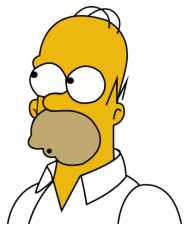

In [104]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/customvision/LegoSimpsons/PredictionImages/simpsons_PNG6.png"
image = Image.open(image_file)
with open(image_file, "rb") as image_contents:
    results = predictor.classify_image(project.id, publish_iteration_name, image_contents.read())

# option2: data from URL
image_url = "https://pngimg.com/uploads/simpsons/simpsons_PNG6.png"
image = Image.open(BytesIO(requests.get(image_url).content))
results = predictor.classify_image_url(project.id, publish_iteration_name, image_url)

# visualize image
plt.imshow(image)
plt.axis("off")

# show prediction results
results.as_dict()

**option:** prediction using REST API (alternative)

In [105]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/customvision/LegoSimpsons/PredictionImages/simpsons_PNG6.png"
# set operation URL, ending in /url or /image:
url = "{0}/{1}/classify/iterations/{2}/image".format(azure_customvisionPredict_url, project.id, publish_iteration_name)
print(url)
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
# serialize binary file read
payload = open(image_file, 'rb')
# accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers = dict()
headers['Prediction-Key'] = azure_customvisionPredict_key
headers['Content-Type'] = 'application/octet-stream'
# request prediction and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

https://westeurope.api.cognitive.microsoft.com/customvision/v3.1/Prediction/898c69b4-3b21-4d18-8e7a-747d19265287/classify/iterations/classifyModel/image


{'id': 'd7bbb166-f277-4fd9-8821-69eceea2afc3',
 'project': '898c69b4-3b21-4d18-8e7a-747d19265287',
 'iteration': '0f93a159-8a04-434c-b0f1-c5d8e7224631',
 'created': '2020-08-11T13:30:11.250Z',
 'predictions': [{'probability': 0.9995652,
   'tagId': '1921caf8-0adb-463b-a29d-3f91cc8dea70',
   'tagName': 'Homer',
   'tagType': 'Regular'},
  {'probability': 0.000434849324,
   'tagId': '7f8ca162-dd6b-4a22-be73-8a2244f5ba00',
   'tagName': 'Marge',
   'tagType': 'Regular'}]}

In [106]:
# option2: data from URL
image_url = "https://pngimg.com/uploads/simpsons/simpsons_PNG6.png"
# set operation URL, ending in /url or /image:
url = "{0}/{1}/classify/iterations/{2}/url".format(azure_customvisionPredict_url, project.id, publish_iteration_name)
print(url)
# parameters (only comma-separated string allowed, no spaces)
querystring = dict()
# serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})
# accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers = dict()
headers['Prediction-Key'] = azure_customvisionPredict_key
headers['Content-Type'] = 'application/json'
# request prediction and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

https://westeurope.api.cognitive.microsoft.com/customvision/v3.1/Prediction/898c69b4-3b21-4d18-8e7a-747d19265287/classify/iterations/classifyModel/url


{'id': '8aaa7aad-5c62-45a1-a37f-6d99968dc4fc',
 'project': '898c69b4-3b21-4d18-8e7a-747d19265287',
 'iteration': '0f93a159-8a04-434c-b0f1-c5d8e7224631',
 'created': '2020-08-11T13:30:15.036Z',
 'predictions': [{'probability': 0.9995652,
   'tagId': '1921caf8-0adb-463b-a29d-3f91cc8dea70',
   'tagName': 'Homer',
   'tagType': 'Regular'},
  {'probability': 0.000434849324,
   'tagId': '7f8ca162-dd6b-4a22-be73-8a2244f5ba00',
   'tagName': 'Marge',
   'tagType': 'Regular'}]}

# Face

  * **[Detection](#face_detection):** Detect human faces in an image
  * **[Similarity](#face_similarity):** Find similar faces
  * **[Grouping](#face_grouping):** Organize unidentified faces into groups, based on their visual similarity
  * **[Identification](#face_identification):** Search and identify faces
  * **[Verification](#face_verification):** Check the likelihood that two faces belong to the same person

_Terminology:_  
**Face:** a single face  
**FaceList:** a list of faces for each person  
**PersonGroup:** a list of persons  
**Locations:** top, left, width, and height coordinates of the face region  
**Landmarks:** position of common face elements, such as pupils, nose, and lips  
**Attributes:** age, gender, head pose, smile, facial hair, glasses, emotion, etc  

**howto:** [REST API](https://docs.microsoft.com/en-us/azure/cognitive-services/Face/quickstarts/python)  
**howto:** [python SDK](https://docs.microsoft.com/en-us/azure/cognitive-services/Face/quickstarts/client-libraries?pivots=programming-language-python) (preferred)  

**_You can find all REST API cognitive services_** [here](https://westeurope.dev.cognitive.microsoft.com/docs/services?pageSize=0)

|Type|Operation|Description|Request|URL|Parameters|
|-|-|-|-|-|-|
|Face|**detect**|detect human faces in an image|<span style="color:red">POST</span>|<i>https://{endpoint}/face/v1.0/**detect**</i>|returnFaceId<br>returnFaceLandmarks<br>returnFaceAttributes<br>recognitionModel<br>returnRecognitionModel<br>detectionModel<br>|
|Face|**find similar**|search similar-looking faces from a faceId array|<span style="color:red">POST</span>|<i>https://{endpoint}/face/v1.0/**findsimilars**</i>|-|
|Face|**group**|divide candidate faces into groups based on similarity|<span style="color:red">POST</span>|<i>https://{endpoint}/face/v1.0/**group**</i>|-|
|Face|**identify**|find the closest match from a person group|<span style="color:red">POST</span>|<i>https://{endpoint}/face/v1.0/**identify**</i>|-|
|Face|**verify**|verify faces belong to the same person|<span style="color:red">POST</span>|<i>https://{endpoint}/face/v1.0/**verify**</i>|-|  

### face_detection
Detect human faces in an image.  
Generates an ID for each unique face and its location with face attributes even landmarks

**alternative:** REST API implementation

(-0.5, 499.5, 499.5, -0.5)

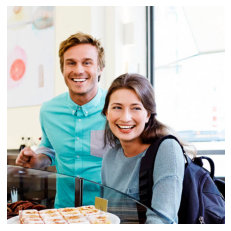

In [107]:
# option1: data from disk
image_file = "../../data/bronze/cognitive/face/main007.jpg"
image = Image.open(image_file)
# option2: data from URL
image_url = "https://www.how-old.net/Images/faces2/main007.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")

In [108]:
# set operation URL:
url = "{0}/detect".format(azure_face_url)
print(url)

https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect


In [109]:
# parameters (only comma-separated, no space)
querystring = dict()
querystring['detectionModel'] = 'detection_01' # fixed value, see API doc
querystring['returnFaceAttributes'] = 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
querystring['returnFaceId'] = 'true'
querystring['returnFaceLandmarks'] = 'false' # points on a face
querystring['returnRecognitionModel'] = 'false'
querystring['recognitionModel'] = 'recognition_01'

In [110]:
# option1: serialize binary file read
payload = open(image_file, 'rb')
# option2: serialize dict to a JSON formatted str
payload = json.dumps({"url":image_url})

In [111]:
headers = dict()
headers['Ocp-Apim-Subscription-Key'] = azure_face_key
# option1: accepts a binary payload ("application/octet-stream") as a byte array that contains the image data
headers['Content-Type'] = 'application/octet-stream'
# option2: accepts a JSON payload ("application/json") that specifies a publicly available image URL
headers['Content-Type'] = 'application/json'

In [112]:
# call for analysis and show results
response = requests.request(method="POST", url=url, data=payload, headers=headers, params=querystring)
json.loads(response.text)

[{'faceId': '848c2b56-1412-4074-aa35-e35bc29458e4',
  'faceRectangle': {'top': 208, 'left': 228, 'width': 91, 'height': 91},
  'faceAttributes': {'smile': 1.0,
   'headPose': {'pitch': -7.3, 'roll': -0.7, 'yaw': -4.2},
   'gender': 'female',
   'age': 33.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.65},
   'noise': {'noiseLevel': 'low', 'value': 0.0},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.06,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 1.0},
     {'color': 'blond', 'confiden

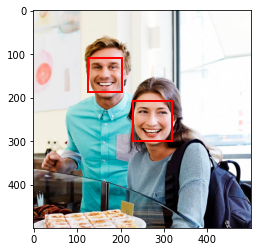

In [113]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((228, 208), 91, 91, linewidth=2, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

rect = patches.Rectangle((125, 109), 79, 79, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

**preferred:** Python SDK implementation

In [114]:
client = FaceClient(azure_face_endpoint, CognitiveServicesCredentials(azure_face_key))

In [115]:
# Alternative: Azure python SDK implementation
# option1: data from disk
response = client.face.detect_with_stream(image=open(image_file, 'rb'))
# option2: data from url
response = client.face.detect_with_url(url=image_url,
                                       return_face_id=True,
                                       return_face_landmarks=False,
                                       return_face_attributes=['age','gender','headPose','smile','facialHair','glasses','emotion','hair','makeup','occlusion','accessories','blur','exposure','noise'],
                                       recognition_model='recognition_01',
                                       return_recognition_model=False,
                                       detection_model='detection_01',
                                       custom_headers=None,
                                       raw=False)
[i.as_dict() for i in response]

[{'face_id': '848c2b56-1412-4074-aa35-e35bc29458e4',
  'face_rectangle': {'width': 91, 'height': 91, 'left': 228, 'top': 208},
  'face_attributes': {'age': 33.0,
   'gender': 'female',
   'smile': 1.0,
   'facial_hair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'noGlasses',
   'head_pose': {'roll': -0.7, 'yaw': -4.2, 'pitch': -7.3},
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'hair': {'bald': 0.06,
    'invisible': False,
    'hair_color': [{'color': 'brown', 'confidence': 1.0},
     {'color': 'blond', 'confidence': 0.5},
     {'color': 'black', 'confidence': 0.34},
     {'color': 'red', 'confidence': 0.32},
     {'color': 'gray', 'confidence': 0.14},
     {'color': 'other', 'confidence': 0.03},
     {'color': 'white', 'confidence': 0.0}]},
   'makeup': {'eye_makeup': True, 'lip_makeup': True},
   'occlusion': {'forehead_occluded': Fa

### face_similarity
Search and find similar faces

[{'face_id': '249df6ec-0053-4f0f-a814-0f00ccb3923c',
  'face_rectangle': {'width': 302, 'height': 302, 'left': 592, 'top': 143}}]

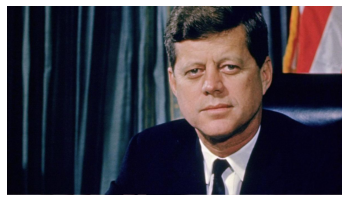

In [116]:
# Detect a face in an image that contains a single face to get an id
image_url = "https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")

# detect the face and assign an ID
detected_faces = client.face.detect_with_url(url=image_url)
[i.as_dict() for i in detected_faces]

[{'face_id': '07f70da9-e7ca-4f6e-87fe-a22feb9f954b',
  'face_rectangle': {'width': 60, 'height': 60, 'left': 152, 'top': 71}},
 {'face_id': '5ab422e9-b228-4848-b735-193d19d68aa3',
  'face_rectangle': {'width': 58, 'height': 58, 'left': 523, 'top': 44}},
 {'face_id': '51b78174-d964-4511-888a-d8c206bbb23d',
  'face_rectangle': {'width': 56, 'height': 56, 'left': 75, 'top': 122}},
 {'face_id': 'cc00788b-1b15-464a-8f44-bcde8709027f',
  'face_rectangle': {'width': 55, 'height': 55, 'left': 413, 'top': 57}},
 {'face_id': 'c8c1df9a-427c-4af9-9a0d-3fe773a1243f',
  'face_rectangle': {'width': 54, 'height': 54, 'left': 275, 'top': 100}},
 {'face_id': '00e2df33-6dcf-4fa1-875c-18340f7af833',
  'face_rectangle': {'width': 51, 'height': 51, 'left': 286, 'top': 295}},
 {'face_id': 'eda18dc7-65bb-4925-8d94-7e1b45b0dda8',
  'face_rectangle': {'width': 49, 'height': 49, 'left': 607, 'top': 131}}]

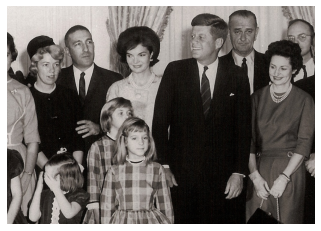

In [117]:
# Detect the faces in an image that contains multiple faces
image_url = "http://www.historyplace.com/kennedy/president-family-portrait-closeup.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")

# Each detected face gets assigned a new ID
# multi_face_image_url = "http://www.historyplace.com/kennedy/president-family-portrait-closeup.jpg"
# multi_image_name = os.path.basename(image_url)
detected_faces2 = client.face.detect_with_url(url=image_url)
[i.as_dict() for i in detected_faces2]

In [118]:
# Search through faces detected in group image for the single face from first image
similar_faces = client.face.find_similar(face_id=detected_faces[0].face_id,
                                         face_ids=list(map(lambda x: x.face_id, detected_faces2)))
# details of the similar faces detected
[i.as_dict() for i in similar_faces]

[{'face_id': 'cc00788b-1b15-464a-8f44-bcde8709027f',
  'confidence': 0.517329752}]

In [119]:
for face in similar_faces:
    face_info = next(x for x in detected_faces2 if x.face_id == similar_faces[0].face_id)

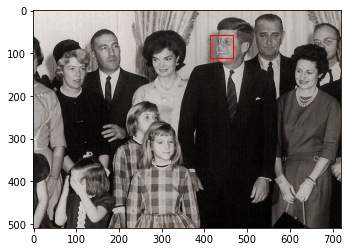

In [120]:
# Create figure and axes
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
left = face_info.face_rectangle.left
top = face_info.face_rectangle.top
width = face_info.face_rectangle.width
height = face_info.face_rectangle.height

rect = patches.Rectangle((left, top), width, height, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

### face_grouping
Organize unidentified faces into groups, based on their visual similarity

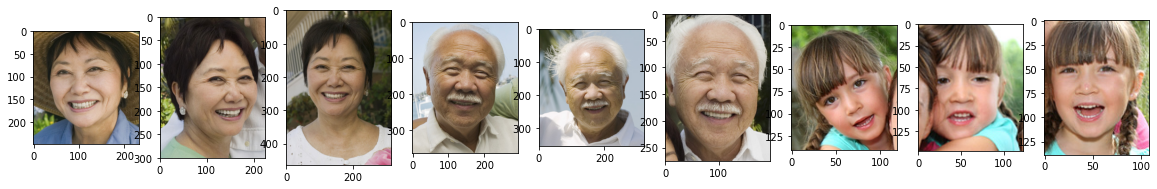

In [121]:
# three sets of face images corresponding to three different people (woman, man, child)
# dataset (data from disk)
images = []
images.append("../../data/bronze/cognitive/face/woman1-person-group.jpg")
images.append("../../data/bronze/cognitive/face/woman2-person-group.jpg")
images.append("../../data/bronze/cognitive/face/woman3-person-group.jpg")
images.append("../../data/bronze/cognitive/face/man1-person-group.jpg")
images.append("../../data/bronze/cognitive/face/man2-person-group.jpg")
images.append("../../data/bronze/cognitive/face/man3-person-group.jpg")
images.append("../../data/bronze/cognitive/face/child1-person-group.jpg")
images.append("../../data/bronze/cognitive/face/child2-person-group.jpg")
images.append("../../data/bronze/cognitive/face/child3-person-group.jpg")
plt.figure(figsize=(20,10))
columns = 9
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(Image.open(image))

#### Create

In [122]:
# Used in the Person Group Operations,  Snapshot Operations, and Delete Person Group examples.
# PERSON_GROUP_ID must be lower case, alphanumeric, and/or with '-', '_'.
PERSON_GROUP_ID = 'my-unique-person-group'
# Used for the Snapshot and Delete Person Group examples.
TARGET_PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)

In [123]:
# Create empty Person Group.
client.person_group.create(person_group_id=PERSON_GROUP_ID, name=PERSON_GROUP_ID)

In [124]:
# define 3 person names within this person group
woman = client.person_group_person.create(PERSON_GROUP_ID, "Woman")
man = client.person_group_person.create(PERSON_GROUP_ID, "Man")
child = client.person_group_person.create(PERSON_GROUP_ID, "Child")

In [125]:
'''
Detect faces and register to correct person
'''
# sort images by prefix and assign to each person name
# Find all jpeg images in working directory
woman_images = [file for file in glob.glob('../../data/bronze/cognitive/face/*.jpg') if file.startswith("../../data/bronze/cognitive/face/woman")]
man_images   = [file for file in glob.glob('../../data/bronze/cognitive/face/*.jpg') if file.startswith("../../data/bronze/cognitive/face/man")]
child_images = [file for file in glob.glob('../../data/bronze/cognitive/face/*.jpg') if file.startswith("../../data/bronze/cognitive/face/child")]

# Add to a woman person
for file in woman_images:
    image = open(file, 'r+b')
    client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, woman.person_id, image)

# Add to a man person
for file in man_images:
    image = open(file, 'r+b')
    client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, man.person_id, image)

# Add to a child person
for file in child_images:
    image = open(file, 'r+b')
    client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, child.person_id, image)

In [126]:
woman.person_id

'8f1a77cc-9fe0-462e-b0af-06a73ccc1676'

In [127]:
'''
Train PersonGroup
'''
# Train the person group
client.person_group.train(PERSON_GROUP_ID)

In [128]:
# check status, succeeded
training_status = client.person_group.get_training_status(PERSON_GROUP_ID)
training_status.__dict__

{'additional_properties': {},
 'status': <TrainingStatusType.succeeded: 'succeeded'>,
 'created': datetime.datetime(2020, 8, 11, 13, 30, 49, 746189, tzinfo=<isodate.tzinfo.Utc object at 0x7f7848426a58>),
 'last_action': datetime.datetime(2020, 8, 11, 13, 30, 50, 10108, tzinfo=<isodate.tzinfo.Utc object at 0x7f7848426a58>),
 'last_successful_training': None,
 'message': None}

### face_identification
Search and compares each detected face to a PersonGroup  

(-0.5, 799.5, 531.5, -0.5)

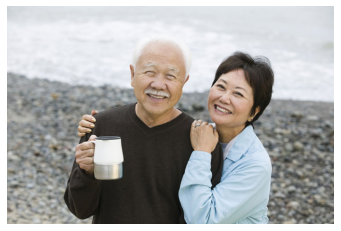

In [129]:
# get a test image (data from disk)
image_file = "../../data/bronze/cognitive/face/test-image-person-group.jpg"
image = Image.open(image_file)
plt.imshow(image)
plt.axis("off")

In [130]:
# Detect faces
face_ids = []
faces = client.face.detect_with_stream(image=open(image_file, 'rb'))
for face in faces:
    face_ids.append(face.face_id)

In [131]:
face_ids

['a555bdd4-4f10-4d71-a56a-273880105b0a',
 'c75a94ed-ced5-4d19-824a-32de01802440']

In [132]:
# Identify faces (1-to-many)
results = client.face.identify(face_ids, PERSON_GROUP_ID)
[i.as_dict() for i in results]

[{'face_id': 'a555bdd4-4f10-4d71-a56a-273880105b0a',
  'candidates': [{'person_id': 'd141cccf-69bd-491c-b3c9-2c40da7b36c6',
    'confidence': 0.92387}]},
 {'face_id': 'c75a94ed-ced5-4d19-824a-32de01802440',
  'candidates': [{'person_id': '8f1a77cc-9fe0-462e-b0af-06a73ccc1676',
    'confidence': 0.93316}]}]

In [133]:
# remember group person
print("woman: ", woman.person_id)
print("man: ", man.person_id)
print("child: ", child.person_id)

woman:  8f1a77cc-9fe0-462e-b0af-06a73ccc1676
man:  d141cccf-69bd-491c-b3c9-2c40da7b36c6
child:  8be66b70-05cd-4848-af2d-2b067565e84c


### face_verification
Check the likelihood that two faces belong to the same person  

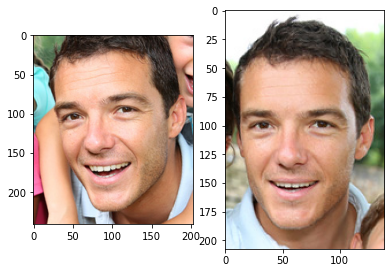

In [134]:
# verify if these two face images are similar of the same person
# dataset (data from disk)
images = []
images.append("../../data/bronze/cognitive/face/Family1-Dad1.jpg")
images.append("../../data/bronze/cognitive/face/Family1-Dad3.jpg")
plt.figure(figsize=(20,10))
columns = 6
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(Image.open(image))

In [135]:
# Detect faces from source image 1 and target image 2
detected_faces1 = client.face.detect_with_stream(image=open(images[0], 'rb'))
detected_faces2 = client.face.detect_with_stream(image=open(images[1], 'rb'))
# Get face ID from source and target
source_id = detected_faces1[0].face_id
target_id = detected_faces2[0].face_id

print("source id:", source_id)
print("target id:", target_id)

source id: aa86e719-4faf-49b7-a527-211ccc00a6ca
target id: 99705531-dbb0-4348-aded-02a8ca3bcc0c


In [136]:
# verify similarity, the higher the confidence, the more identical the faces in the images are
verify_result_same = client.face.verify_face_to_face(source_id, target_id)
verify_result_same.as_dict()

{'is_identical': True, 'confidence': 0.88193}

source id: 1b3740b5-f9d2-4bba-8b4e-484011ec501f
target id: e5799708-06fd-4e86-af19-1673d7c3f761


{'is_identical': False, 'confidence': 0.26628}

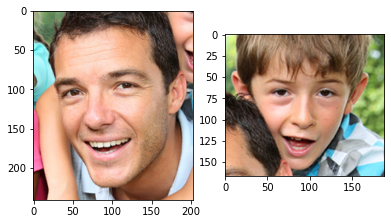

In [137]:
# verify if these two face images are similar of the same person
# dataset (data from disk)
images = []
images.append("../../data/bronze/cognitive/face/Family1-Dad1.jpg")
images.append("../../data/bronze/cognitive/face/Family1-Son1.jpg")
plt.figure(figsize=(20,10))
columns = 6
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(Image.open(image))

# Detect faces from source image 1 and target image 2
detected_faces1 = client.face.detect_with_stream(image=open(images[0], 'rb'))
detected_faces2 = client.face.detect_with_stream(image=open(images[1], 'rb'))
# Get face ID from source and target
source_id = detected_faces1[0].face_id
target_id = detected_faces2[0].face_id
print("source id:", source_id)
print("target id:", target_id)

# verify similarity, the higher the confidence, the more identical the faces in the images are
verify_result_same = client.face.verify_face_to_face(source_id, target_id)
verify_result_same.as_dict()

# Text_Analytics

  * **[language detection](#detect_language):** detect language  
  * **[key phrase detection](#key_phrases):** identify the main points  
  * **[linked entities](#linked_entities):** find web link to key words  
  * **[named entities](#named_entities):** detect entity categories (people, place, organization, etc...) 
  * **[sentiment](#sentiment):** positive or negative opinion  
  
**_You can find all REST API cognitive services_** [here](https://westeurope.dev.cognitive.microsoft.com/docs/services?pageSize=0)

|Operation|Description|Request|URL|Parameters|
|-|-|-|-|-|
|**languages**|detect language|<span style="color:red">POST</span>|<i>https://{endpoint}/text/analytics/v3.0/**languages**</i>|model-version<br>showStats|
|**key phrases**|list key phrases|<span style="color:red">POST</span>|<i>https://{endpoint}/text/analytics/v3.0/**keyPhrases**</i>|model-version<br>showStats|
|**linked entities**|list entities to knowledge base|<span style="color:red">POST</span>|<i>https://{endpoint}/text/analytics/v3.0/**entities/linking**</i>|model-version<br>showStats|
|**named entitity recognition**|list [general named](https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/named-entity-types?tabs=general) entities|<span style="color:red">POST</span>|<i>https://{endpoint}/text/analytics/v3.0/**entities/recognition/general**<br>https://{endpoint}/text/analytics/v3.0/**entities/recognition/personal**<br>https://{endpoint}/text/analytics/v3.0/**entities/recognition/health**</i>|model-version<br>showStats|
|**sentiment**|positive, negative, neutral|<span style="color:red">POST</span>|<i>https://{endpoint}/text/analytics/v3.0/**sentiment**</i>|model-version<br>showStats|  


**note:** _API [version compatibility](https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/language-support?tabs=sentiment-analysis), if unavailable will return v2.1 results_

In [138]:
client = TextAnalyticsClient(azure_textanalytics_endpoint, AzureKeyCredential(azure_textanalytics_key))

### detect_language

In [139]:
documents = ["Dit is een heel mooie show.",
             "This document is written in English."]

In [140]:
response = client.detect_language(documents)
[i.__dict__ for i in response]

[{'id': '0',
  'primary_language': DetectedLanguage(name=Dutch, iso6391_name=nl, confidence_score=1.0),
  'warnings': [],
  'statistics': None,
  'is_error': False},
 {'id': '1',
  'primary_language': DetectedLanguage(name=English, iso6391_name=en, confidence_score=0.99),
  'warnings': [],
  'statistics': None,
  'is_error': False}]

### key_phrases

In [141]:
documents = ["My cat might need to see a veterinarian."]

In [142]:
response = client.extract_key_phrases(documents)
[i.__dict__ for i in response]

[{'id': '0',
  'key_phrases': ['cat', 'veterinarian'],
  'warnings': [],
  'statistics': None,
  'is_error': False}]

### linked_entities

In [143]:
documents = ["Dit is een heel mooie show.",
             "This document is written in English."]

In [144]:
response = client.recognize_linked_entities(documents)
[i.__dict__ for i in response]

[{'id': '0',
  'entities': [],
  'warnings': [],
  'statistics': None,
  'is_error': False},
 {'id': '1',
  'entities': [LinkedEntity(name=English language, matches=[LinkedEntityMatch(confidence_score=0.21, text=in English)], language=en, data_source_entity_id=English language, url=https://en.wikipedia.org/wiki/English_language, data_source=Wikipedia)],
  'warnings': [],
  'statistics': None,
  'is_error': False}]

### named_entities

In [145]:
documents = ["I had a wonderful trip to Seattle last week."]

In [146]:
response = client.recognize_entities(documents)
[i.__dict__ for i in response]

[{'id': '0',
  'entities': [CategorizedEntity(text=trip, category=Event, subcategory=None, confidence_score=0.61),
   CategorizedEntity(text=Seattle, category=Location, subcategory=GPE, confidence_score=0.82),
   CategorizedEntity(text=last week, category=DateTime, subcategory=DateRange, confidence_score=0.8)],
  'warnings': [],
  'statistics': None,
  'is_error': False}]

### sentiment

In [147]:
documents = ["Dit is een heel mooie show.",
             "This was a waste of my time. The speaker put me to sleep."]

In [148]:
response = client.analyze_sentiment(documents)
[i.__dict__ for i in response]

[{'id': '0',
  'sentiment': 'positive',
  'warnings': [],
  'statistics': None,
  'confidence_scores': SentimentConfidenceScores(positive=0.92, neutral=0.06, negative=0.02),
  'sentences': [SentenceSentiment(text=Dit is een heel mooie show., sentiment=positive, confidence_scores=SentimentConfidenceScores(positive=0.92, neutral=0.06, negative=0.02))],
  'is_error': False},
 {'id': '1',
  'sentiment': 'negative',
  'warnings': [],
  'statistics': None,
  'confidence_scores': SentimentConfidenceScores(positive=0.0, neutral=0.0, negative=1.0),
  'sentences': [SentenceSentiment(text=This was a waste of my time., sentiment=negative, confidence_scores=SentimentConfidenceScores(positive=0.0, neutral=0.0, negative=1.0)),
   SentenceSentiment(text=The speaker put me to sleep., sentiment=neutral, confidence_scores=SentimentConfidenceScores(positive=0.12, neutral=0.85, negative=0.03))],
  'is_error': False}]

# SPEECH

  * **[text to speech](#text_to_speech):** synthesizes the received text to speech  
  * **[speech_to_text](#speech_to_text):** translate audio into text  
  
**more information:** https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/

### text_to_speech

In [149]:
# define configuration for speech
# supported regions: https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/regions
speech_config = SpeechConfig(azure_speech_key, azure_speech_region)

In [150]:
# neural voices are available in westeurope 
# choose language neural voice: https://aka.ms/speech/tts-languages
speech_config.speech_synthesis_voice_name = "nl-NL-ColetteNeural"

In [151]:
# create audio file
audio_filename = "../../data/bronze/cognitive/speech/text-to-speech-example.wav"
audio_output = AudioOutputConfig(filename=audio_filename)

In [152]:
# create speech synthesizer using the configured voice
speech_synthesizer = SpeechSynthesizer(speech_config, audio_output)

In [153]:
# Synthesize to speech
text = "Dit is een heel mooie show."
result = speech_synthesizer.speak_text_async(text).get()

In [154]:
Audio(result._audio_data, autoplay=True)

### speech_to_text

In [155]:
# define configuration for speech
# supported regions: https://docs.microsoft.com/en-us/azure/cognitive-services/speech-service/regions
speech_config = SpeechConfig(azure_speech_key, azure_speech_region)

In [156]:
# set the language, list found here: https://aka.ms/speech/sttt-languages
speech_config.speech_recognition_language = 'nl-NL'

In [157]:
# create an audio configuration that points to an audio file
audio_filename = "../../data/bronze/cognitive/speech/text-to-speech-example.wav"
audio_input = AudioConfig(filename=audio_filename)

In [158]:
# create a recognizer with the given settings
speech_recognizer = SpeechRecognizer(speech_config, audio_input)

In [159]:
# Starts speech recognition, and returns after a single utterance is recognized. The end of a
# single utterance is determined by listening for silence at the end or until a maximum of 15
# seconds of audio is processed.  The task returns the recognition text as result. 
# Note: Since recognize_once() returns only a single utterance, it is suitable only for single
# shot recognition like command or query. 
# For long-running multi-utterance recognition, use start_continuous_recognition() instead.
result = speech_recognizer.recognize_once()
result.__dict__

{'_cancellation_details': None,
 '_no_match_details': None,
 '_offset': 600000,
 '_duration': 18900000,
 '_result_id': '89a3acb61fcf49e9a0c8b4152e0e12a9',
 '_reason': <ResultReason.RecognizedSpeech: 3>,
 '_text': 'Dit is een heel mooie show.',
 '_json': '{"DisplayText":"Dit is een heel mooie show.","Duration":18900000,"Id":"90b4f391db0248e9a16e1abfce17b232","Offset":600000,"RecognitionStatus":"Success"}',
 '_error_json': '',
 '_properties': {<PropertyId.SpeechServiceResponse_JsonResult: 5000>: '{"DisplayText":"Dit is een heel mooie show.","Duration":18900000,"Id":"90b4f391db0248e9a16e1abfce17b232","Offset":600000,"RecognitionStatus":"Success"}',
  <PropertyId.SpeechServiceResponse_RecognitionLatencyMs: 5002>: '750'}}